In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [39]:
plt.rcParams['figure.figsize'] = (30, 30)
plt.rcParams['figure.dpi'] = 200

# Load dataset

In [7]:
df = pd.read_csv("superstore_dataset2011-2015.csv")
df.head()

Row ID         Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   42433     AG-2011-2040   1/1/2011  6/1/2011  Standard Class    TB-11280   
1   22253    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   
2   48883     HU-2011-1220   1/1/2011  5/1/2011    Second Class      AT-735   
3   11731  IT-2011-3647632   1/1/2011  5/1/2011    Second Class    EM-14140   
4   22255    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   

     Customer Name      Segment         City            State  ...  \
0  Toby Braunhardt     Consumer  Constantine      Constantine  ...   
1      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   
2    Annie Thurman     Consumer     Budapest         Budapest  ...   
3     Eugene Moren  Home Office    Stockholm        Stockholm  ...   
4      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   

         Product ID         Category Sub-Category  \
0  OFF-TEN-10000025  Office Supplies      Storage   
1   OFF-SU-10000618  Office Supplies     Supplies   
2  OFF-TEN-10001585  Office Supplies      Storage   
3   OFF-PA-10001492  Office Supplies        Paper   
4   FUR-FU-10003447        Furniture  Furnishings   

                  Product Name    Sales Quantity Discount   Profit  \
0          Tenex Lockers, Blue  408.300        2      0.0  106.140   
1     Acme Trimmer, High Speed  120.366        3      0.1   36.036   
2      Tenex Box, Single Width   66.120        4      0.0   29.640   
3  Enermax Note Cards, Premium   44.865        3      0.5  -26.055   
4   Eldon Light Bulb, Duo Pack  113.670        5      0.1   37.770   

   Shipping Cost  Order Priority  
0          35.46          Medium  
1           9.72          Medium  
2           8.17            High  
3           4.82            High  
4           4.70          Medium  

[5 rows x 24 columns]

# Some statistics of dataset

In [8]:
df.describe()

Row ID   Postal Code         Sales      Quantity      Discount  \
count  51290.00000   9994.000000  51290.000000  51290.000000  51290.000000   
mean   25645.50000  55190.379428    246.490581      3.476545      0.142908   
std    14806.29199  32063.693350    487.565361      2.278766      0.212280   
min        1.00000   1040.000000      0.444000      1.000000      0.000000   
25%    12823.25000  23223.000000     30.758625      2.000000      0.000000   
50%    25645.50000  56430.500000     85.053000      3.000000      0.000000   
75%    38467.75000  90008.000000    251.053200      5.000000      0.200000   
max    51290.00000  99301.000000  22638.480000     14.000000      0.850000   

             Profit  Shipping Cost  
count  51290.000000   51290.000000  
mean      28.610982      26.375915  
std      174.340972      57.296804  
min    -6599.978000       0.000000  
25%        0.000000       2.610000  
50%        9.240000       7.790000  
75%       36.810000      24.450000  
max     8399.976000     933.570000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [45]:
df = df[["Country", "Sub-Category", "City", "Profit", "Product Name"]]
df

Country Sub-Category         City    Profit  \
0            Algeria      Storage  Constantine  106.1400   
1          Australia     Supplies  Wagga Wagga   36.0360   
2            Hungary      Storage     Budapest   29.6400   
3             Sweden        Paper    Stockholm  -26.0550   
4          Australia  Furnishings  Wagga Wagga   37.7700   
...              ...          ...          ...       ...   
51285  United States      Binders    Fairfield    4.5188   
51286        Morocco      Binders       Agadir    0.4200   
51287      Nicaragua       Labels      Managua   12.3600   
51288         Mexico       Labels       Ju�rez    0.5600   
51289  United States    Fasteners     Loveland   -0.6048   

                                          Product Name  
0                                  Tenex Lockers, Blue  
1                             Acme Trimmer, High Speed  
2                              Tenex Box, Single Width  
3                          Enermax Note Cards, Premium  
4                           Eldon Light Bulb, Duo Pack  
...                                                ...  
51285  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl  
51286          Wilson Jones Hole Reinforcements, Clear  
51287           Hon Color Coded Labels, 5000 Label Set  
51288           Hon Legal Exhibit Labels, Alphabetical  
51289                              Bagged Rubber Bands  

[51290 rows x 5 columns]

# Countries

## 1. Number of unique countries

In [109]:
len(df["Country"].unique())

147

In [110]:
df["Country"].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Bangladesh',
       'United States', 'Angola', 'China', 'Panama', 'Iran', 'France',
       'Italy', 'Germany', 'Canada', 'United Kingdom', 'Ukraine', 'Japan',
       'Indonesia', 'Nigeria', 'South Korea', 'Peru', 'Philippines',
       'Colombia', 'Ireland', 'Nicaragua', 'Mexico', 'Brazil', 'Turkey',
       'Spain', 'Poland', 'India', 'Somalia', 'El Salvador', 'Sudan',
       'Slovakia', 'Egypt', 'Saudi Arabia',
       'Democratic Republic of the Congo', 'Norway', 'New Zealand',
       'Kenya', 'Cuba', 'Venezuela', 'Singapore', 'Honduras', 'Tanzania',
       'Dominican Republic', 'Morocco', 'Albania', 'Belgium',
       'Afghanistan', 'Bolivia', 'Vietnam', 'Guatemala', 'Guinea-Bissau',
       'Thailand', 'Iraq', 'Myanmar (Burma)', 'Ecuador', 'Netherlands',
       'Ghana', "Cote d'Ivoire", 'Austria', 'Argentina', 'Madagascar',
       'Russia', 'South Africa', 'Bosnia and Herzegovina', 'Malaysia',
       'Romania', 'Israel', 'Burundi', '

## 2. Plot count of each country

In [113]:
countries_count = [(df["Country"] == country).sum() for country in df["Country"].unique()]
countries = pd.DataFrame({"Country": df["Country"].unique(), "count": countries_count})
countries

Country  count
0        Algeria    196
1      Australia   2837
2        Hungary     66
3         Sweden    203
4     Bangladesh    163
..           ...    ...
142    Swaziland      2
143      Estonia     13
144  South Sudan      2
145      Bahrain      2
146    Macedonia      4

[147 rows x 2 columns]

In [114]:
countries["count"].max(), countries["count"].min()

(9994, 2)

In [115]:
countries[countries["count"] == 2]

Country  count
71       Burundi      2
133      Eritrea      2
140         Chad      2
142    Swaziland      2
144  South Sudan      2
145      Bahrain      2

<AxesSubplot:xlabel='Country', ylabel='Count'>

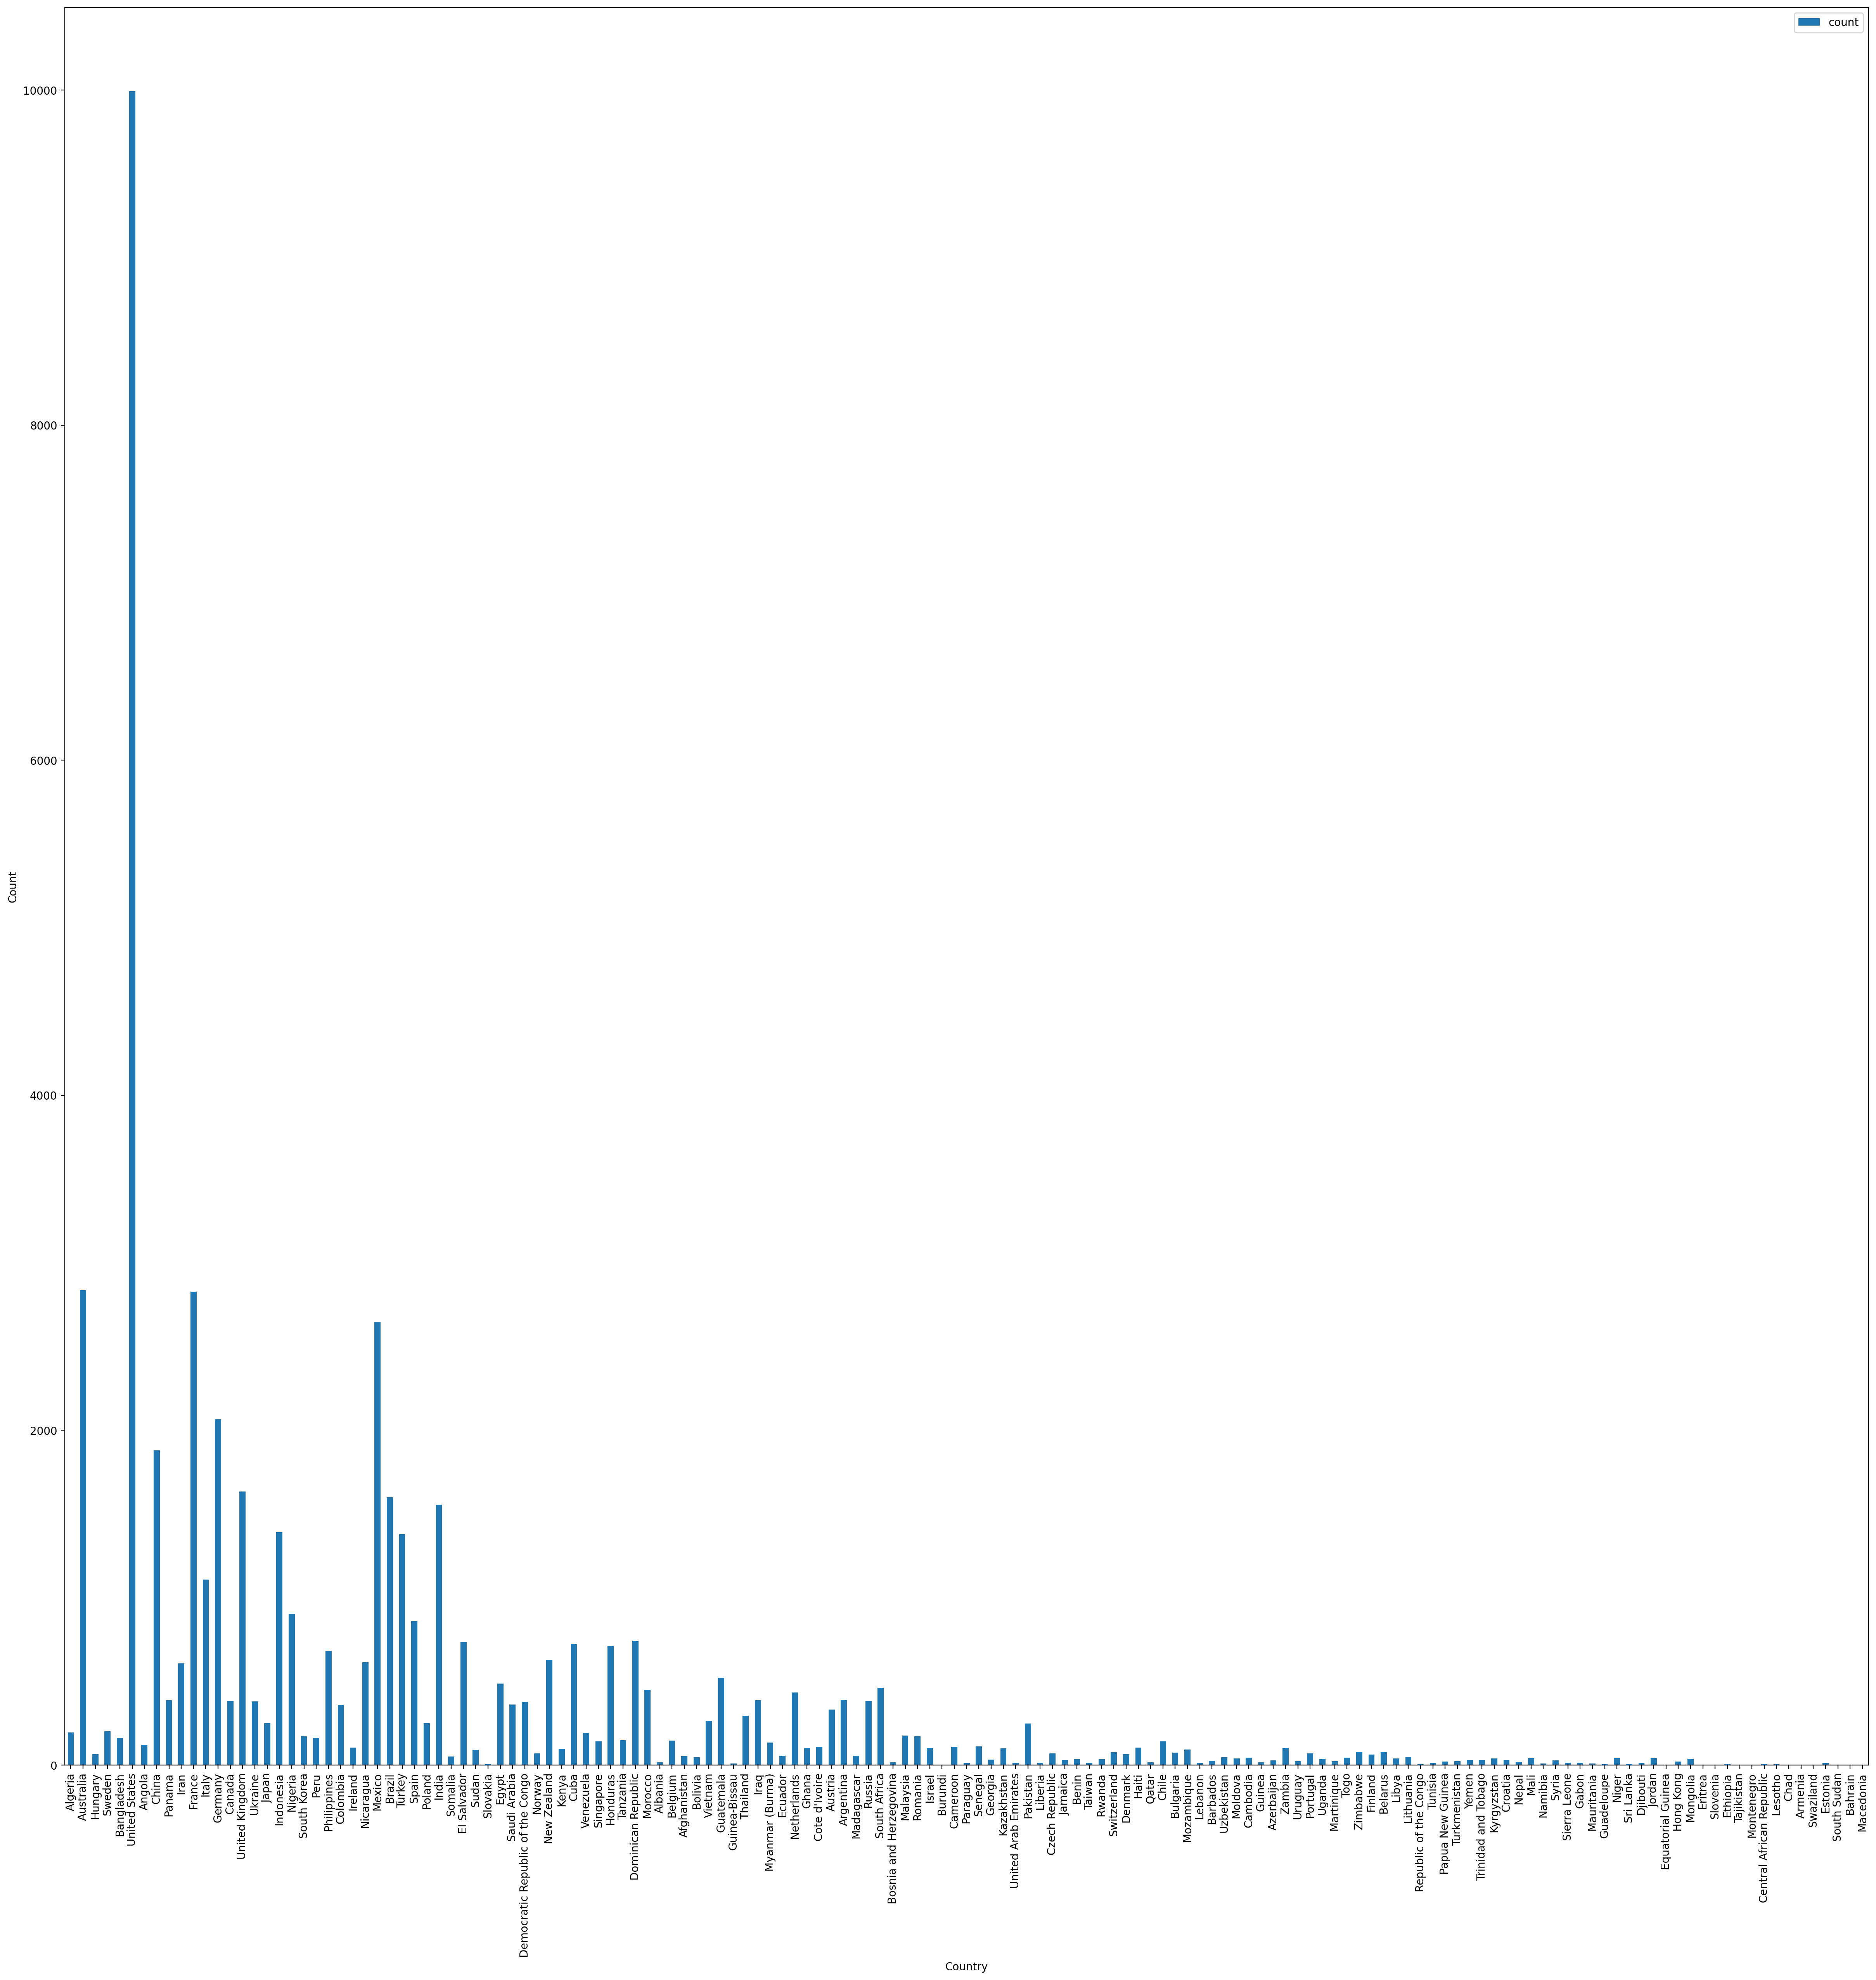

In [111]:
countries.plot.bar(x="Country", y="count", xlabel="Country", ylabel="Count")

# Sub-category

In [50]:
sub_categories = df["Sub-Category"].unique()
print(f"Number of categories: {len(sub_categories)}")
sub_categories

Number of categories: 17


array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Copiers',
       'Bookcases', 'Appliances', 'Art', 'Accessories', 'Binders',
       'Labels', 'Envelopes', 'Chairs', 'Machines', 'Tables', 'Phones',
       'Fasteners'], dtype=object)

In [51]:
sub_categories_count = [(df["Sub-Category"] == category).sum() for category in sub_categories]
sub_categories = pd.DataFrame({"Sub-Category": sub_categories, "count": sub_categories_count})
sub_categories

Sub-Category  count
0       Storage   5059
1      Supplies   2425
2         Paper   3538
3   Furnishings   3170
4       Copiers   2223
5     Bookcases   2411
6    Appliances   1755
7           Art   4883
8   Accessories   3075
9       Binders   6152
10       Labels   2606
11    Envelopes   2435
12       Chairs   3434
13     Machines   1486
14       Tables    861
15       Phones   3357
16    Fasteners   2420

In [52]:
sub_categories['count'].min(), sub_categories["count"].max()

(861, 6152)

<AxesSubplot:xlabel='Sub-Category', ylabel='Count'>

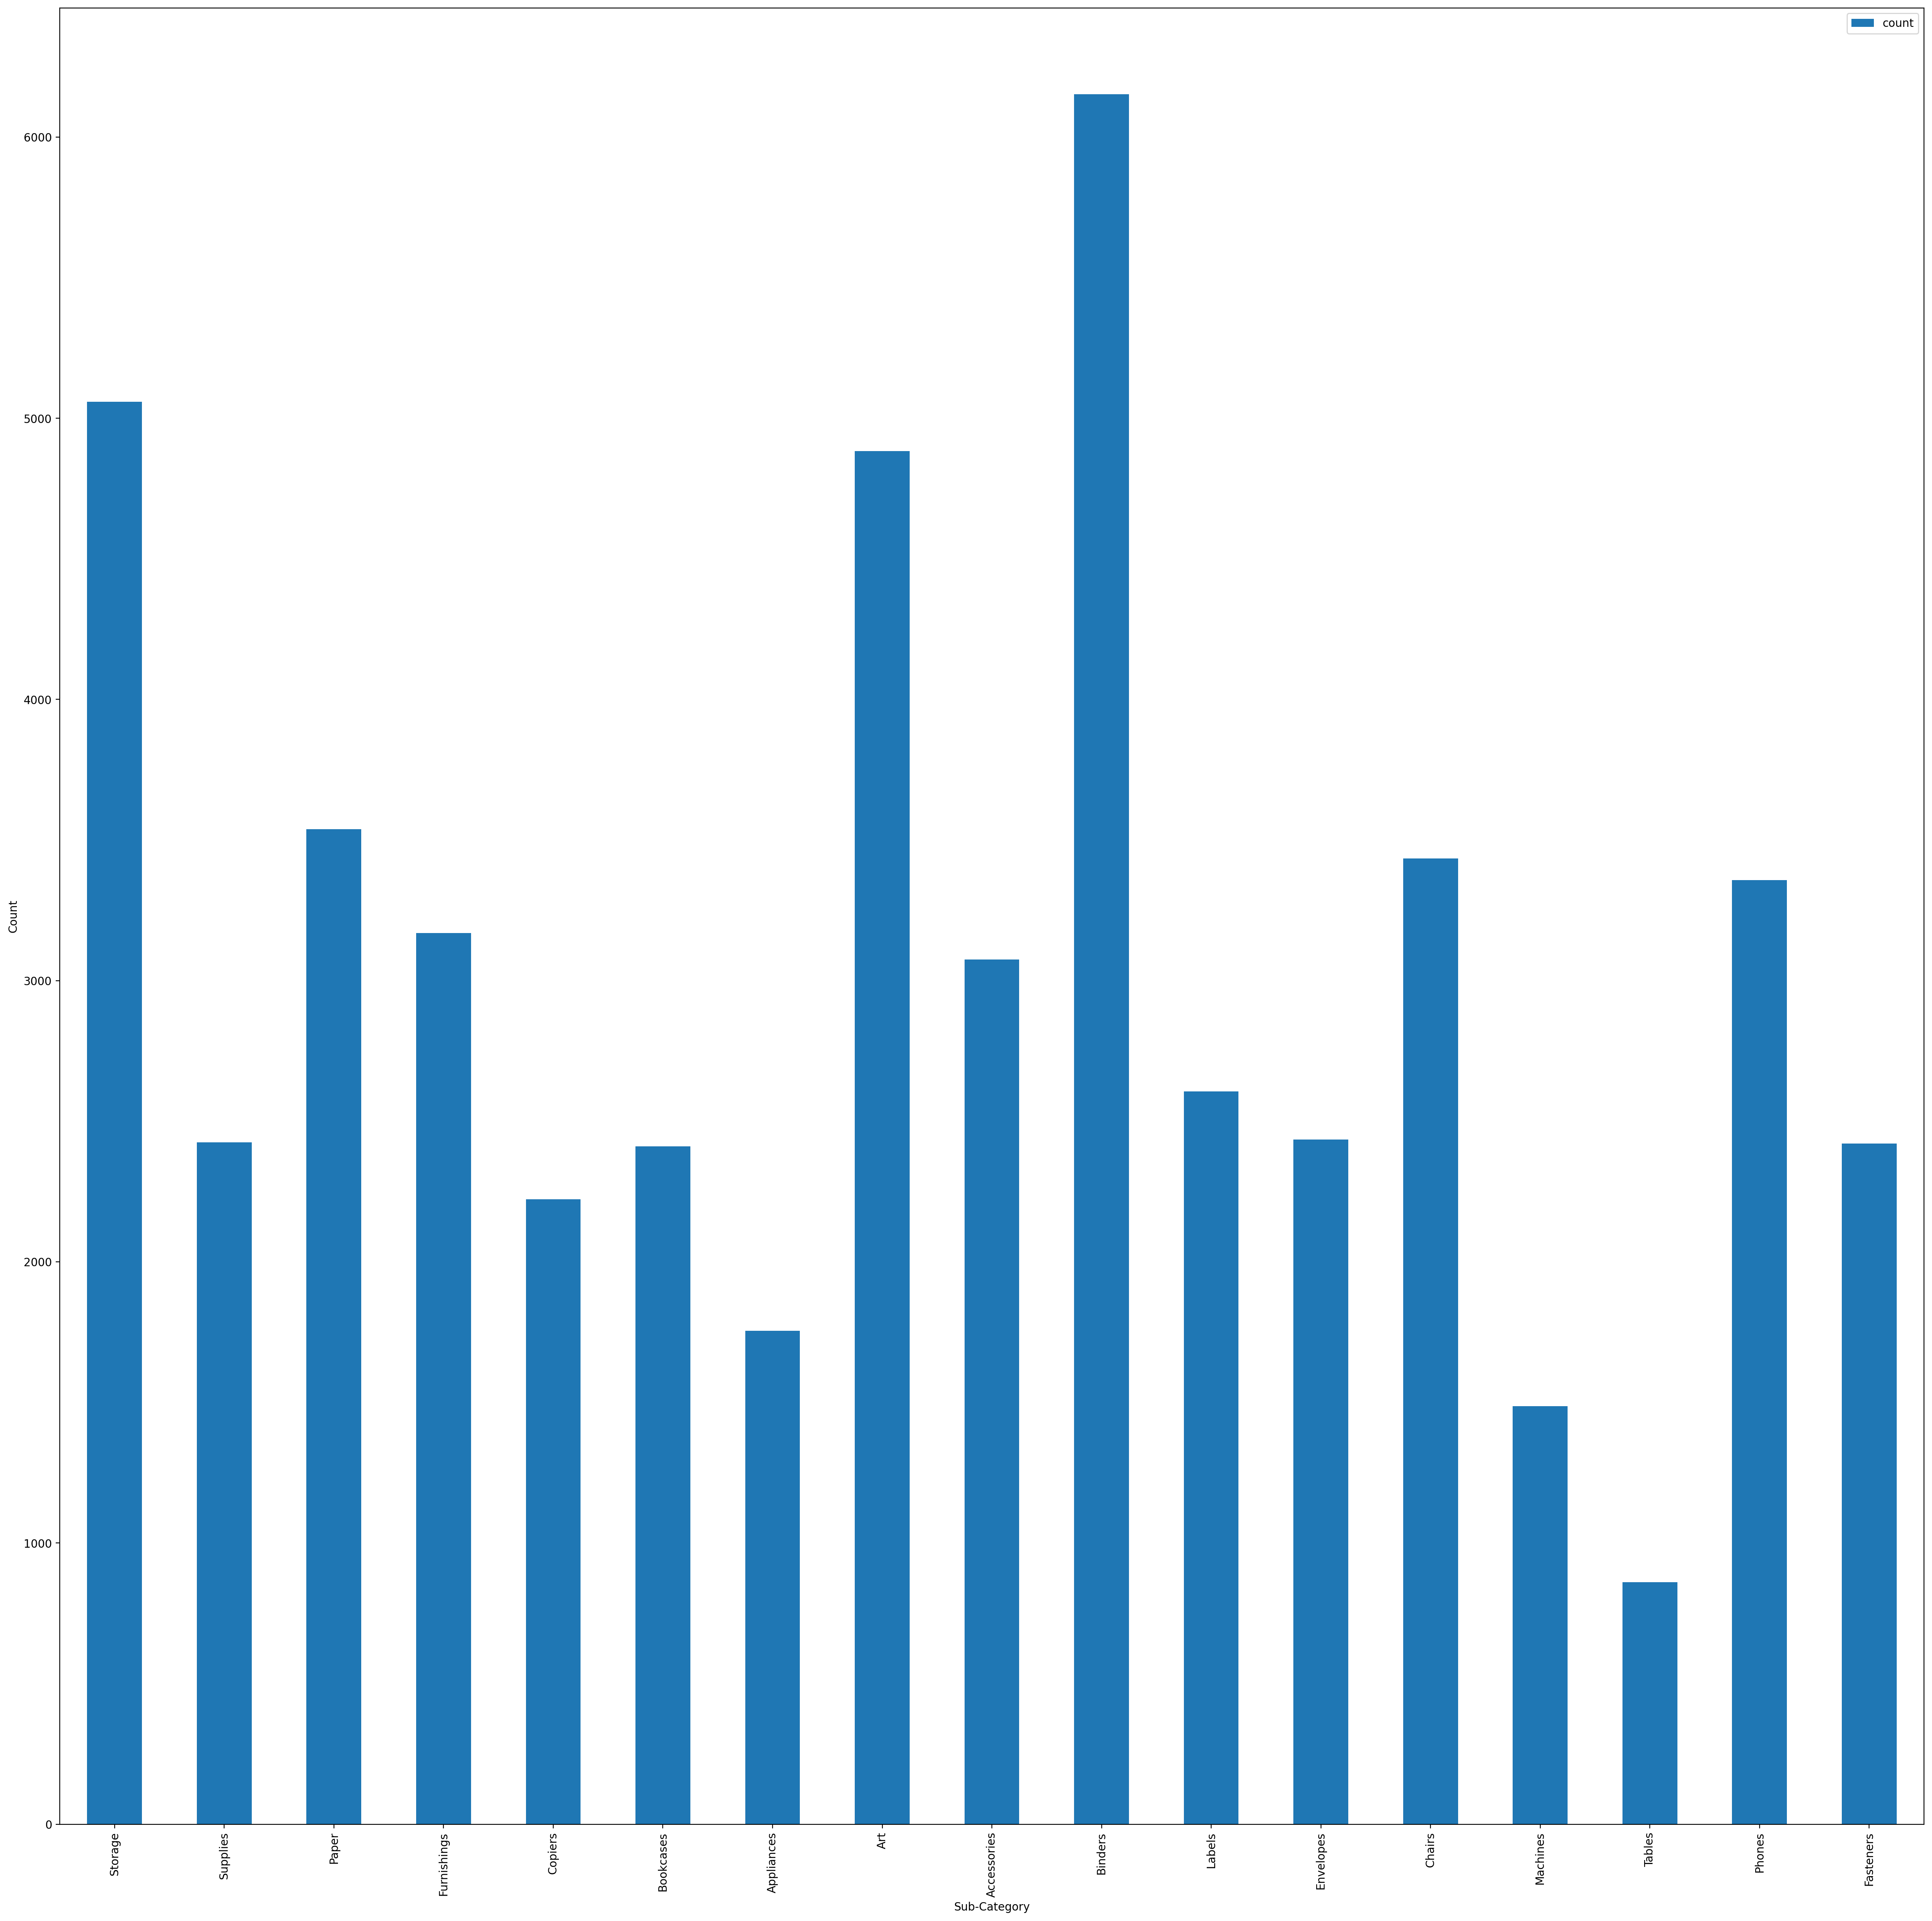

In [117]:
sub_categories.plot.bar(x="Sub-Category", y="count", xlabel="Sub-Category", ylabel="Count")

# Profit

In [118]:
df

Country Sub-Category         City    Profit  \
0            Algeria      Storage  Constantine  106.1400   
1          Australia     Supplies  Wagga Wagga   36.0360   
2            Hungary      Storage     Budapest   29.6400   
3             Sweden        Paper    Stockholm  -26.0550   
4          Australia  Furnishings  Wagga Wagga   37.7700   
...              ...          ...          ...       ...   
51285  United States      Binders    Fairfield    4.5188   
51286        Morocco      Binders       Agadir    0.4200   
51287      Nicaragua       Labels      Managua   12.3600   
51288         Mexico       Labels       Ju�rez    0.5600   
51289  United States    Fasteners     Loveland   -0.6048   

                                          Product Name  
0                                  Tenex Lockers, Blue  
1                             Acme Trimmer, High Speed  
2                              Tenex Box, Single Width  
3                          Enermax Note Cards, Premium  
4                           Eldon Light Bulb, Duo Pack  
...                                                ...  
51285  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl  
51286          Wilson Jones Hole Reinforcements, Clear  
51287           Hon Color Coded Labels, 5000 Label Set  
51288           Hon Legal Exhibit Labels, Alphabetical  
51289                              Bagged Rubber Bands  

[51290 rows x 5 columns]

In [120]:
df["Profit"].min(), df["Profit"].max()

(-6599.978, 8399.976)

In [121]:
df[df["Profit"] == df["Profit"].min()]

Country Sub-Category       City    Profit  \
43453  United States     Machines  Lancaster -6599.978   

                                    Product Name  
43453  Cubify CubeX 3D Printer Double Head Print

In [122]:
df[df["Profit"] == df["Profit"].max()]

Country Sub-Category       City    Profit  \
8898  United States      Copiers  Lafayette  8399.976   

                               Product Name  
8898  Canon imageCLASS 2200 Advanced Copier

<AxesSubplot:ylabel='Profit'>

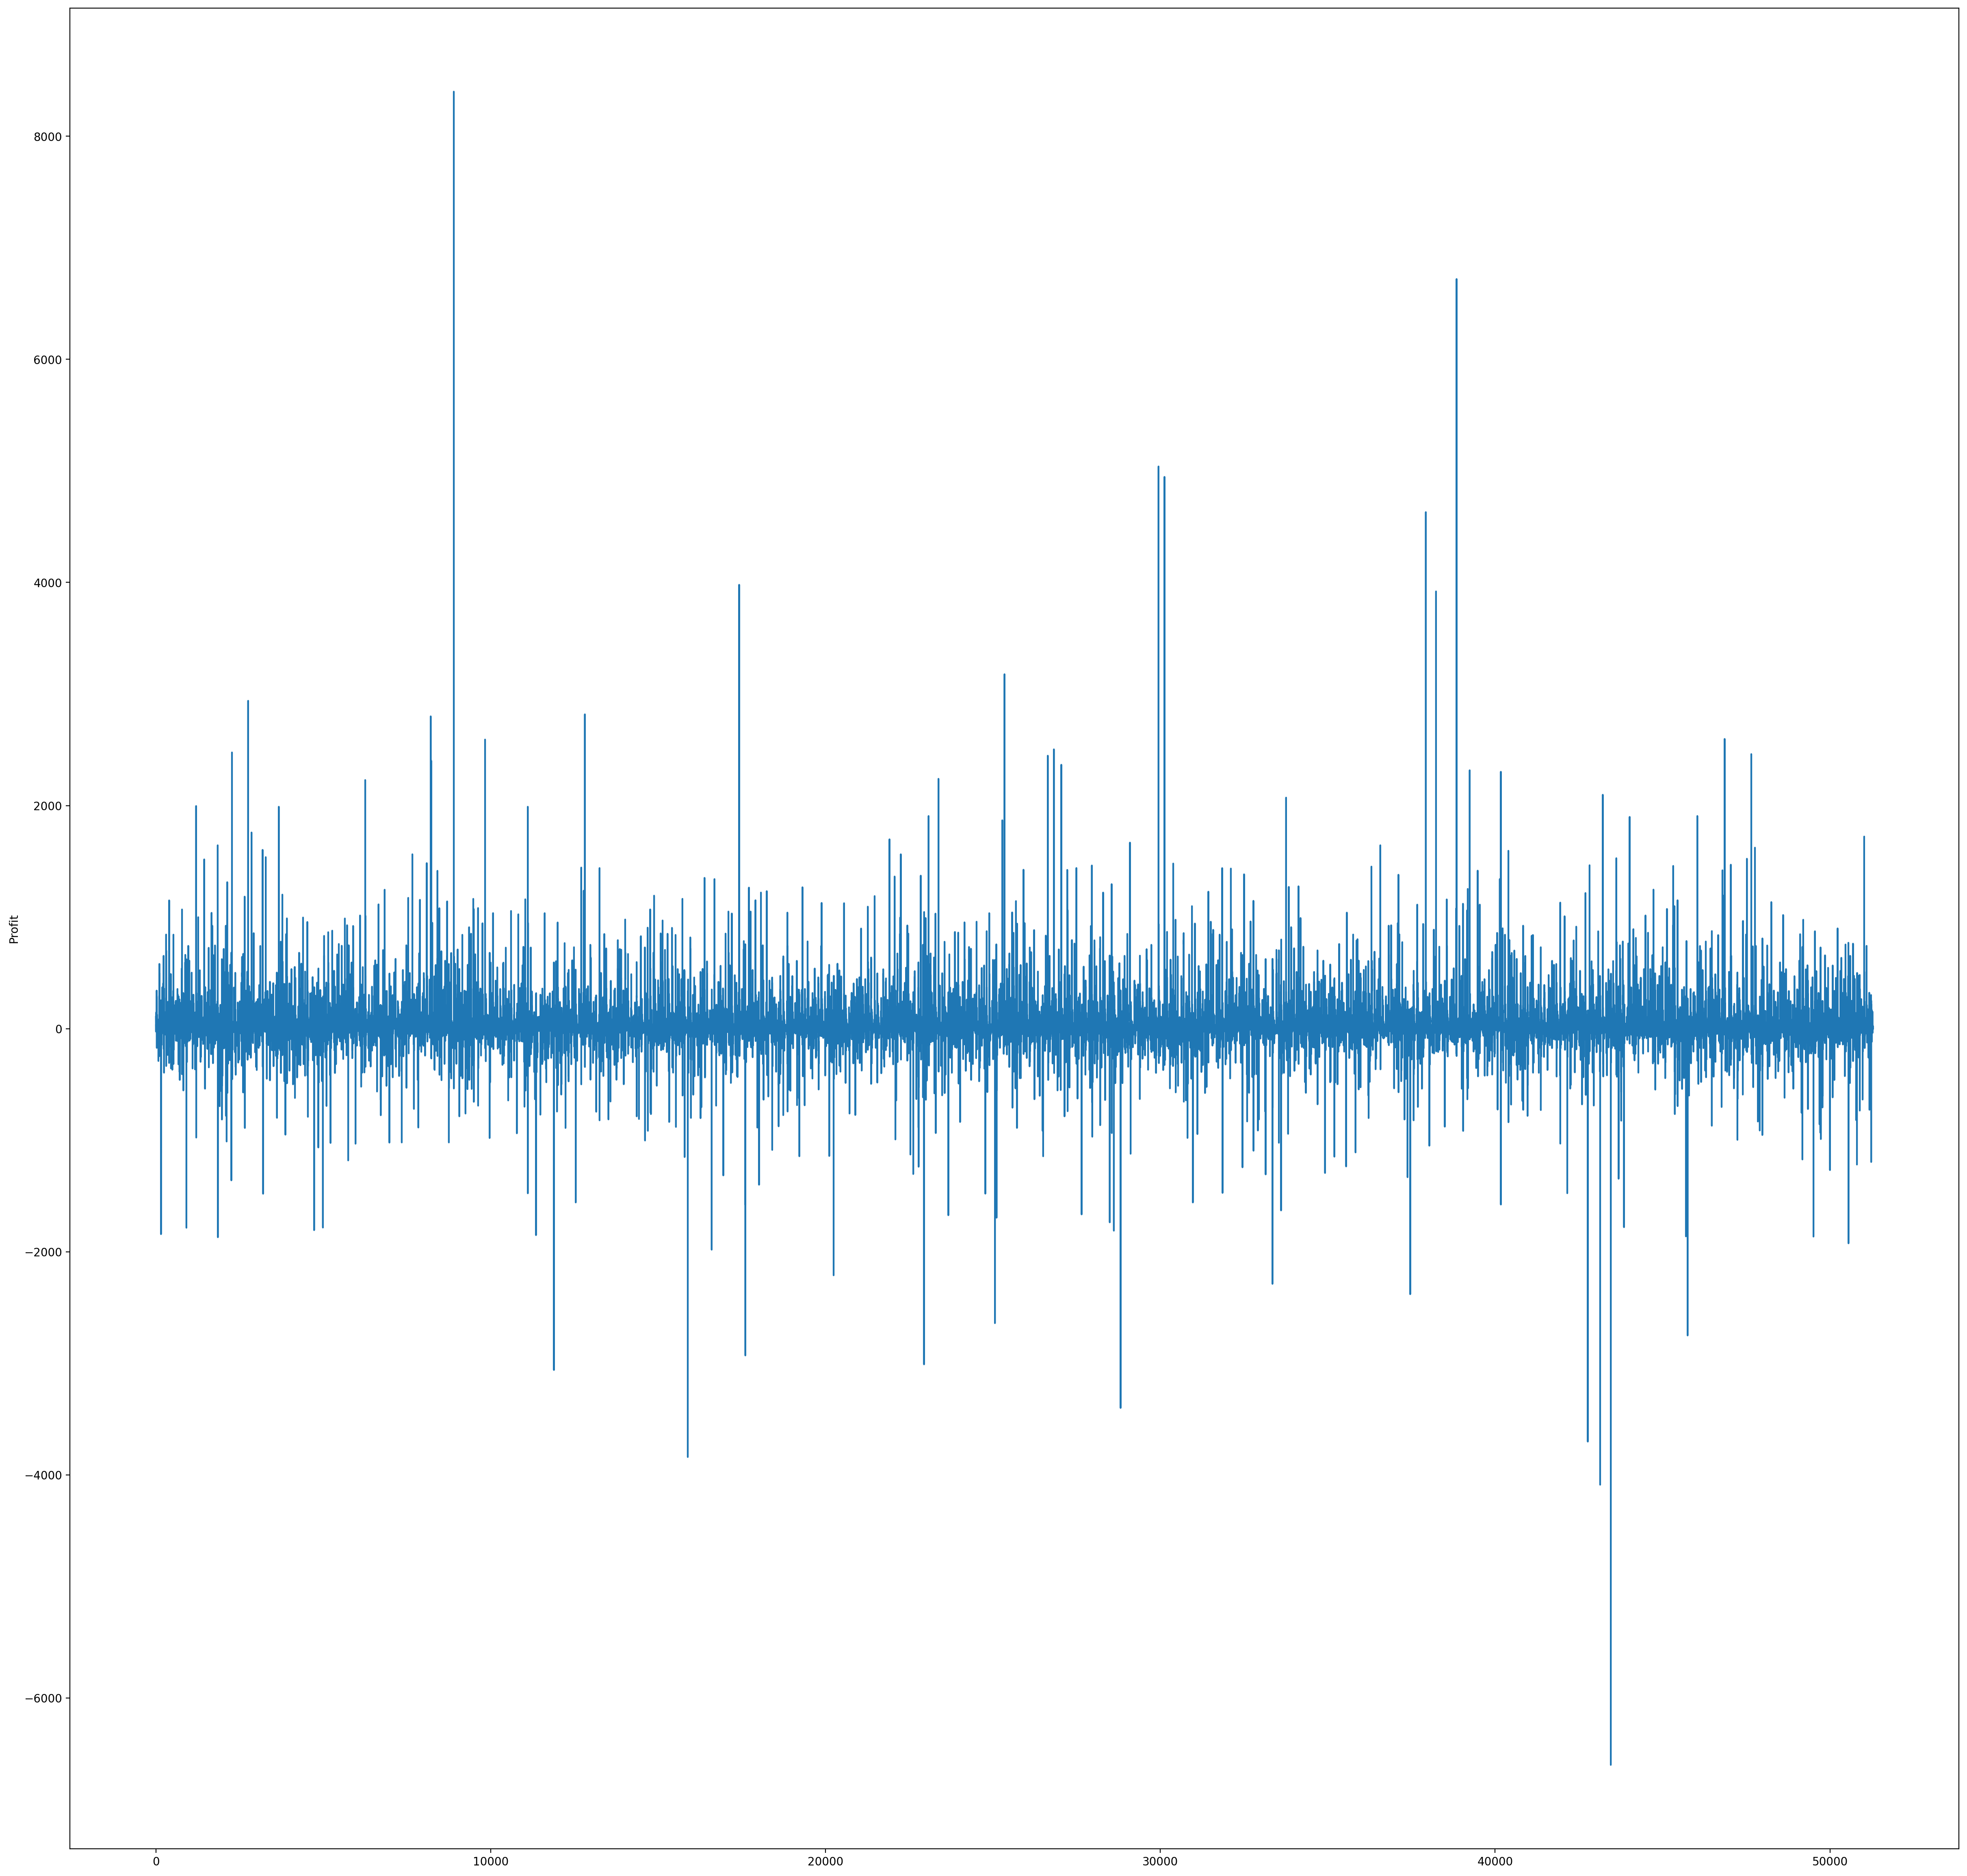

In [119]:
df["Profit"].plot.line(ylabel="Profit")

# Product name

## Profit of each product

In [83]:
product_names = df["Product Name"].unique()
profits = [df[df["Product Name"] == product_name]["Profit"].sum() for product_name in product_names]
products_profits = pd.DataFrame({"Product Name": product_names, "Profit": profits})
products_profits

Product Name     Profit
0                                  Tenex Lockers, Blue  1668.1945
1                             Acme Trimmer, High Speed   614.2400
2                              Tenex Box, Single Width   374.2165
3                          Enermax Note Cards, Premium   573.2307
4                           Eldon Light Bulb, Duo Pack   430.7160
...                                                ...        ...
3783   Star Micronics TSP100 TSP143LAN Receipt Printer   269.3080
3784                 Lexmark S315 Color Inkjet Printer    34.9965
3785  Park Ridge Embossed Executive Business Envelopes    29.2716
3786                                  Acco Glide Clips     9.6040
3787                                Multimedia Mailers   149.8956

[3788 rows x 2 columns]

In [94]:
products_profits.sort_values(by="Profit", ascending=False)

Product Name      Profit
2915      Canon imageCLASS 2200 Advanced Copier  25199.9280
327                Cisco Smart Phone, Full Size  17238.5206
1807            Motorola Smart Phone, Full Size  17027.1130
1602                          Hoover Stove, Red  11807.9690
1153       Sauder Classic Bookcase, Traditional  10672.0730
...                                         ...         ...
1414       Bevis Round Table, Adjustable Height  -3649.8940
3373  Cubify CubeX 3D Printer Triple Head Print  -3839.9904
2048             Motorola Smart Phone, Cordless  -4447.0380
1488  Lexmark MX611dhe Monochrome Laser Printer  -4589.9730
3265  Cubify CubeX 3D Printer Double Head Print  -8879.9704

[3788 rows x 2 columns]

## Plot 100 products that have most profit

<AxesSubplot:xlabel='Product Name'>

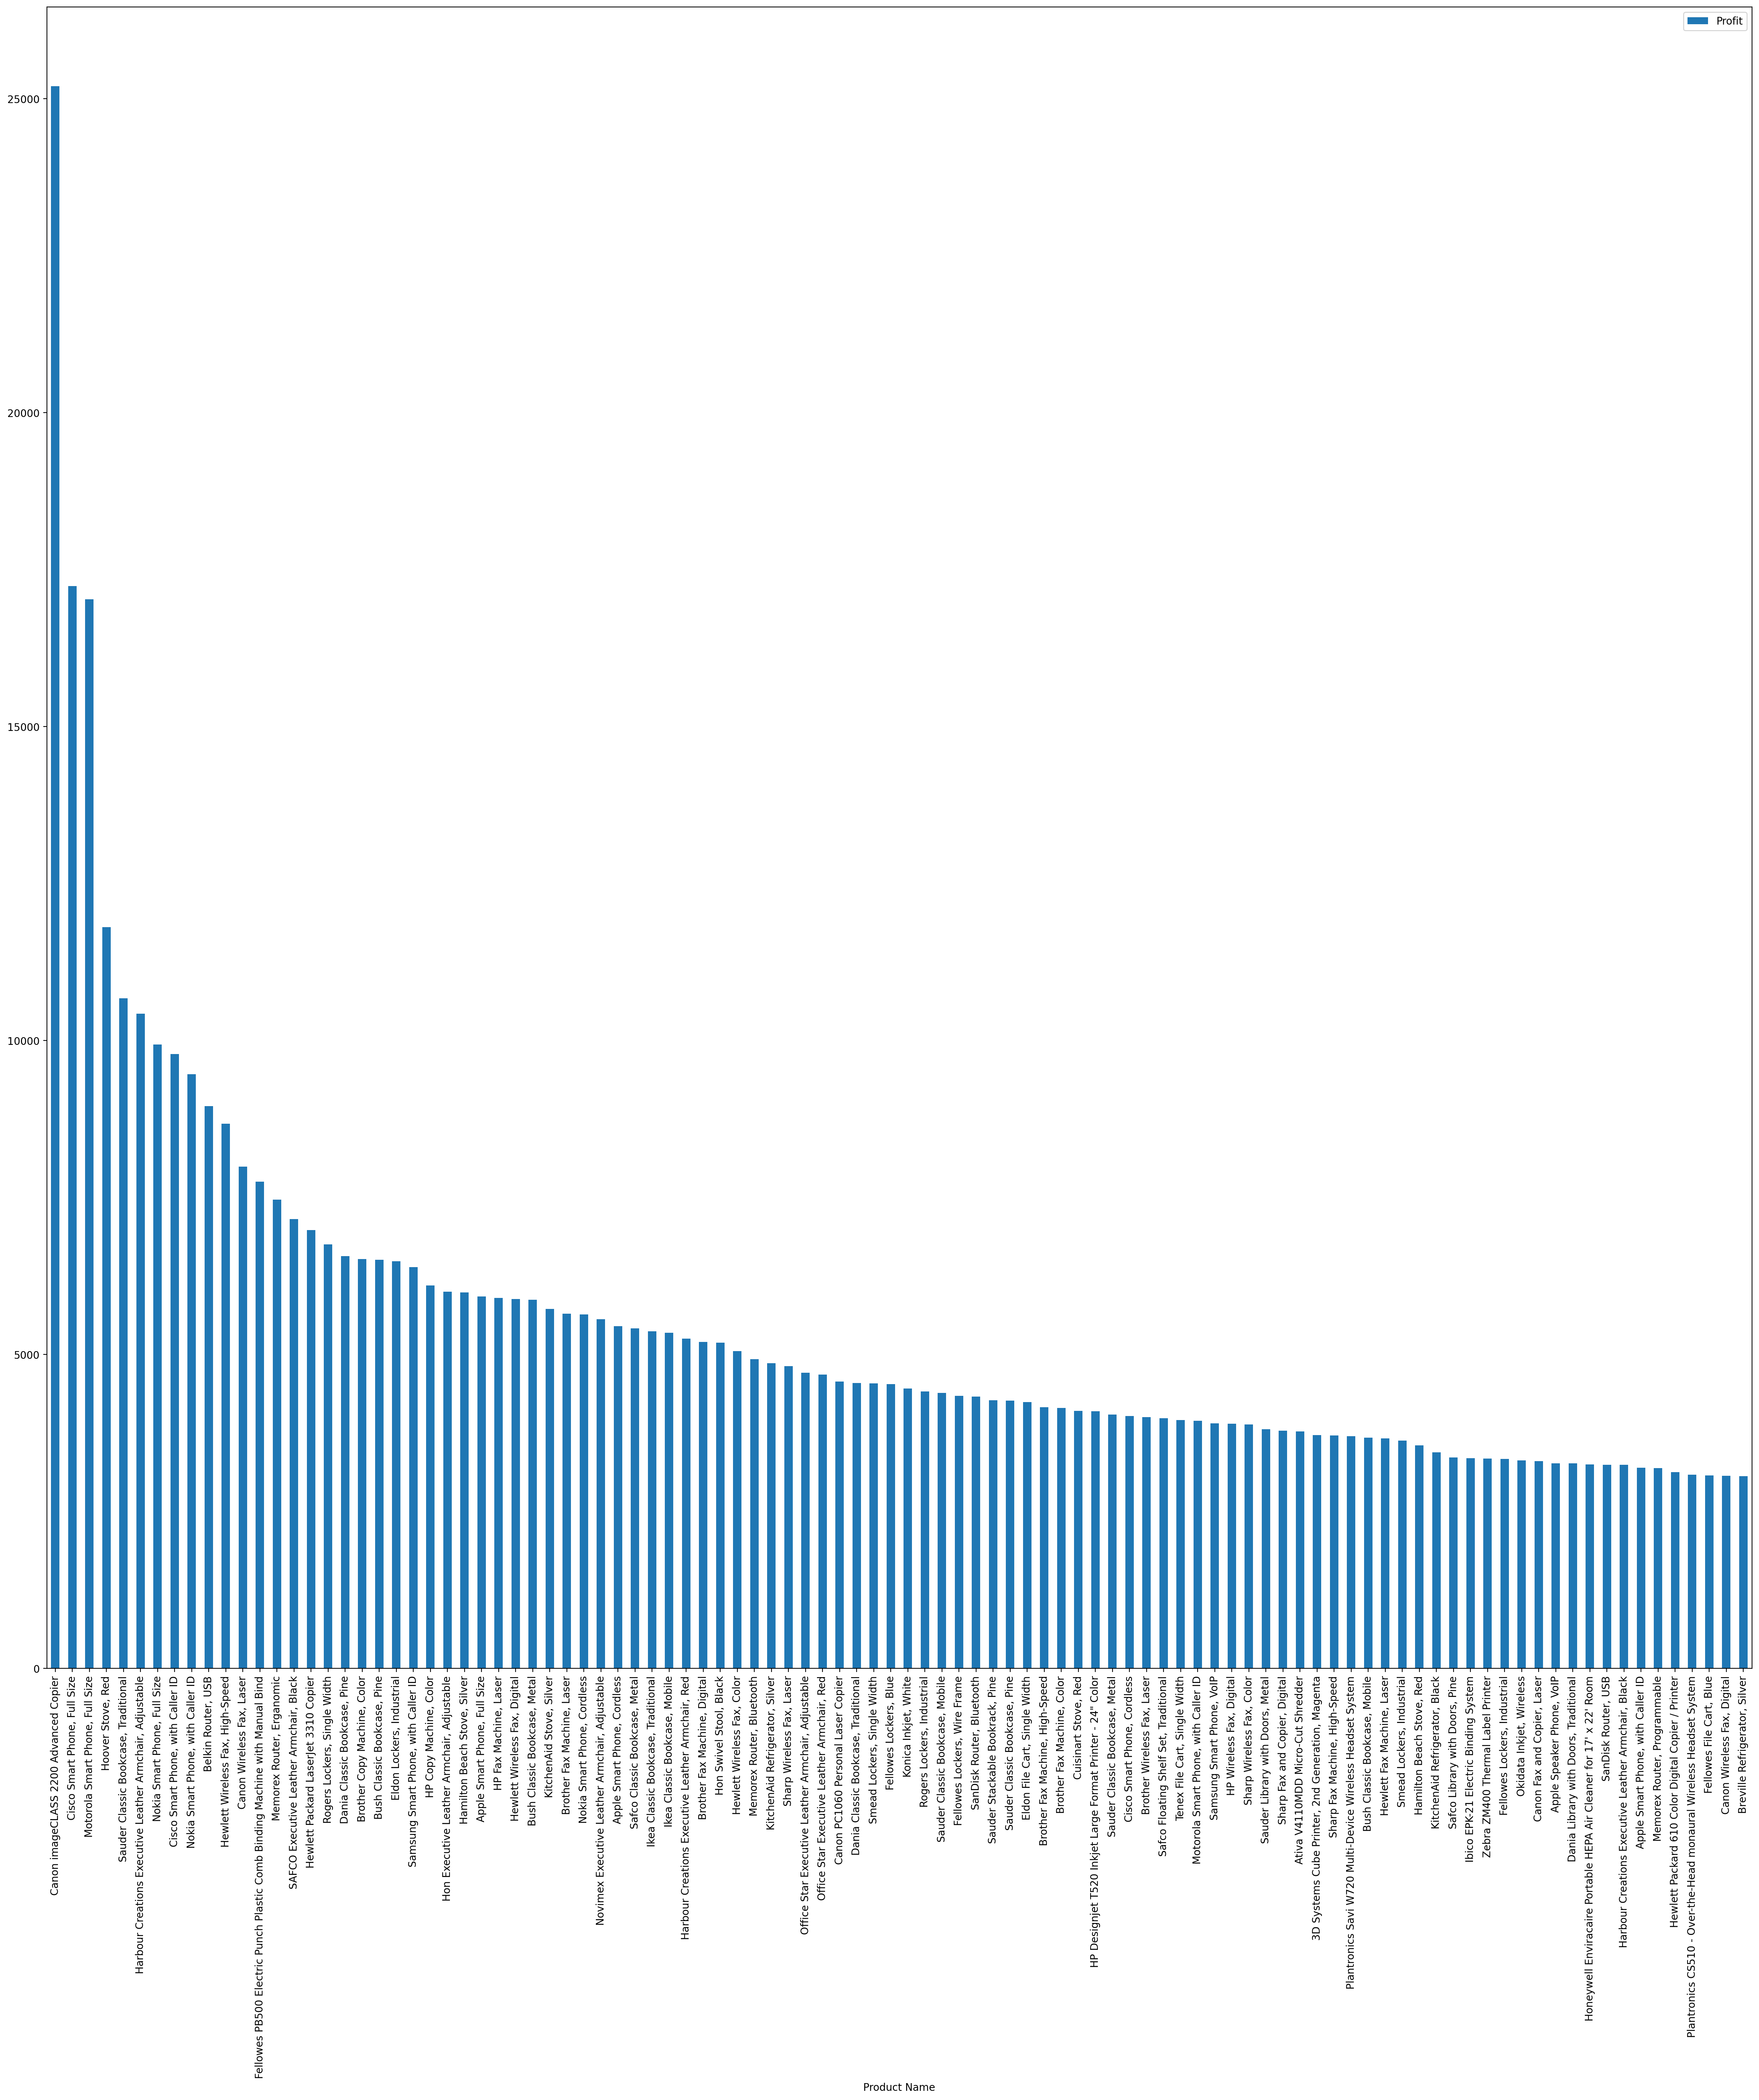

In [92]:
products_profits.sort_values(by="Profit", ascending=False).iloc[:100].plot.bar(x="Product Name", y="Profit")

## Plot 100 products that have least profit

In [95]:
products_profits.sort_values(by="Profit", ascending=True)

Product Name      Profit
3265  Cubify CubeX 3D Printer Double Head Print  -8879.9704
1488  Lexmark MX611dhe Monochrome Laser Printer  -4589.9730
2048             Motorola Smart Phone, Cordless  -4447.0380
3373  Cubify CubeX 3D Printer Triple Head Print  -3839.9904
1414       Bevis Round Table, Adjustable Height  -3649.8940
...                                         ...         ...
1153       Sauder Classic Bookcase, Traditional  10672.0730
1602                          Hoover Stove, Red  11807.9690
1807            Motorola Smart Phone, Full Size  17027.1130
327                Cisco Smart Phone, Full Size  17238.5206
2915      Canon imageCLASS 2200 Advanced Copier  25199.9280

[3788 rows x 2 columns]

<AxesSubplot:xlabel='Product Name', ylabel='Profit'>

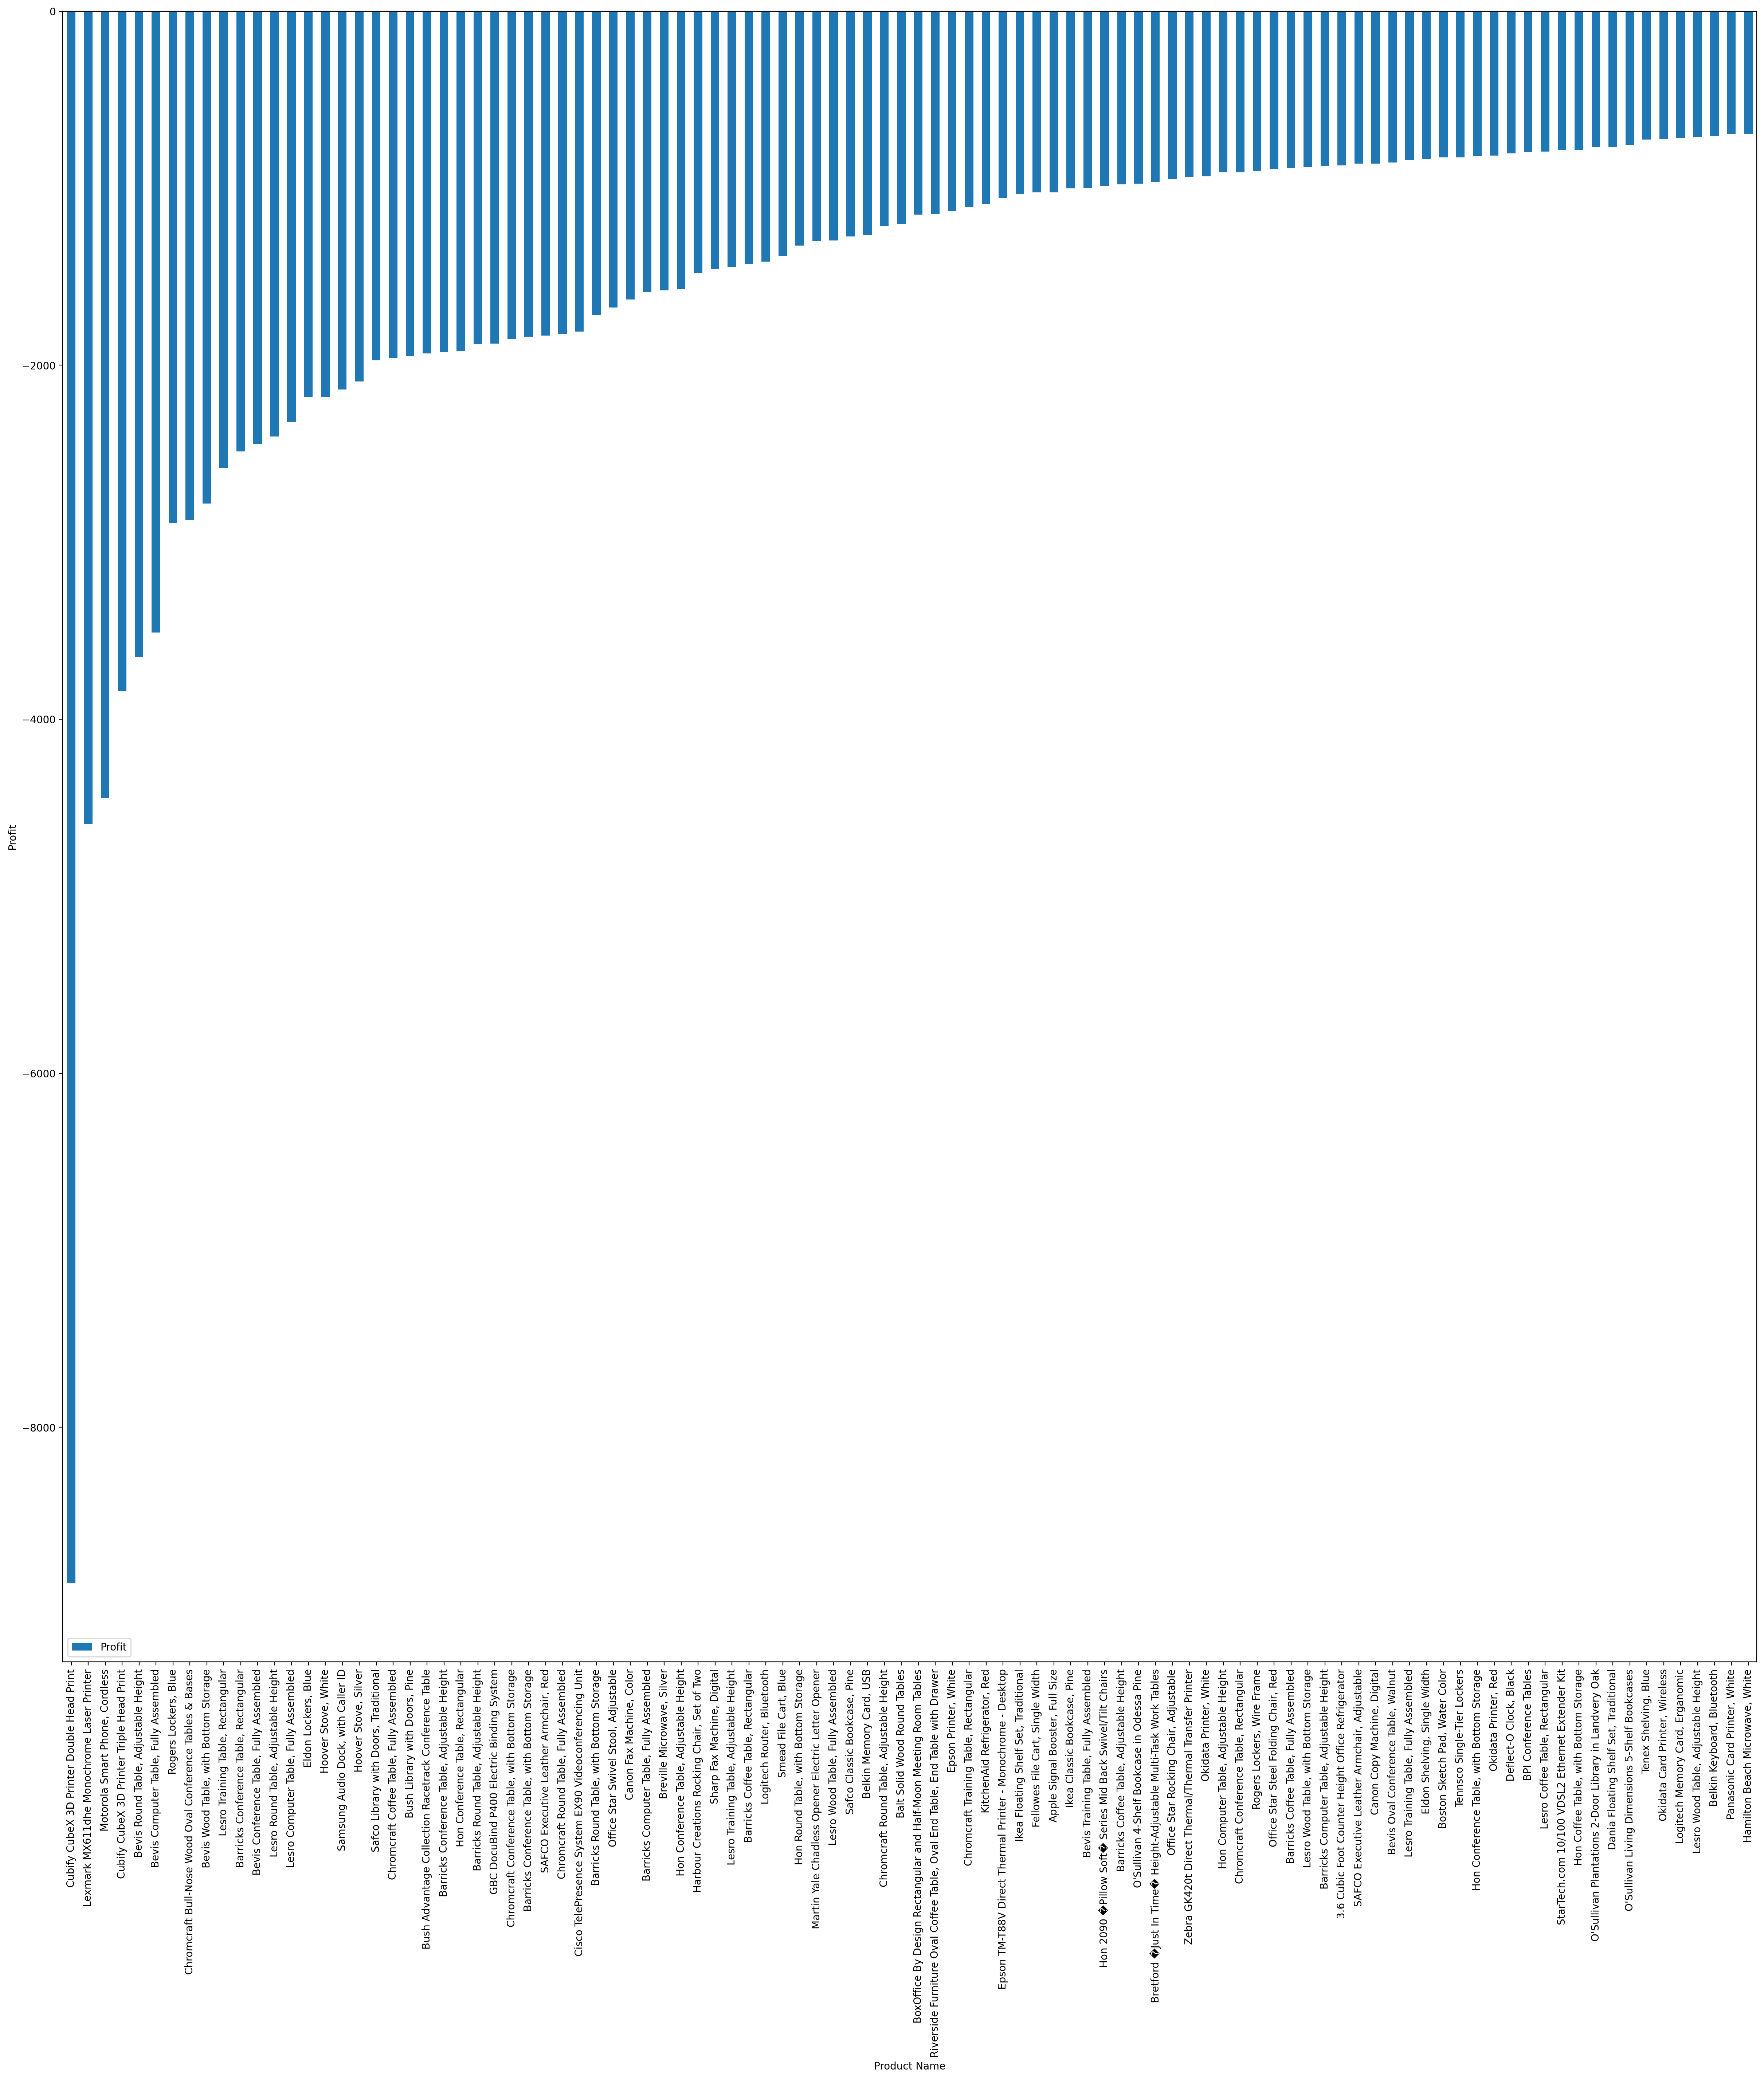

In [105]:
products_profits.sort_values(by="Profit", ascending=True).iloc[:100].plot.bar(x="Product Name", y="Profit", ylabel="Profit")

# City

In [99]:
cities = df["City"].unique()
cities_count = [(df["City"] == city).sum() for city in cities]
cities = pd.DataFrame({"City": cities, "count": cities_count})
cities

City  count
0         Constantine     12
1         Wagga Wagga     28
2            Budapest     56
3           Stockholm    124
4               Dhaka    102
...               ...    ...
3631  San Luis Obispo      1
3632           Maxixe      1
3633         Missoula      1
3634          Lannion      2
3635        Deer Park      1

[3636 rows x 2 columns]

<AxesSubplot:xlabel='City', ylabel='Number of cities'>

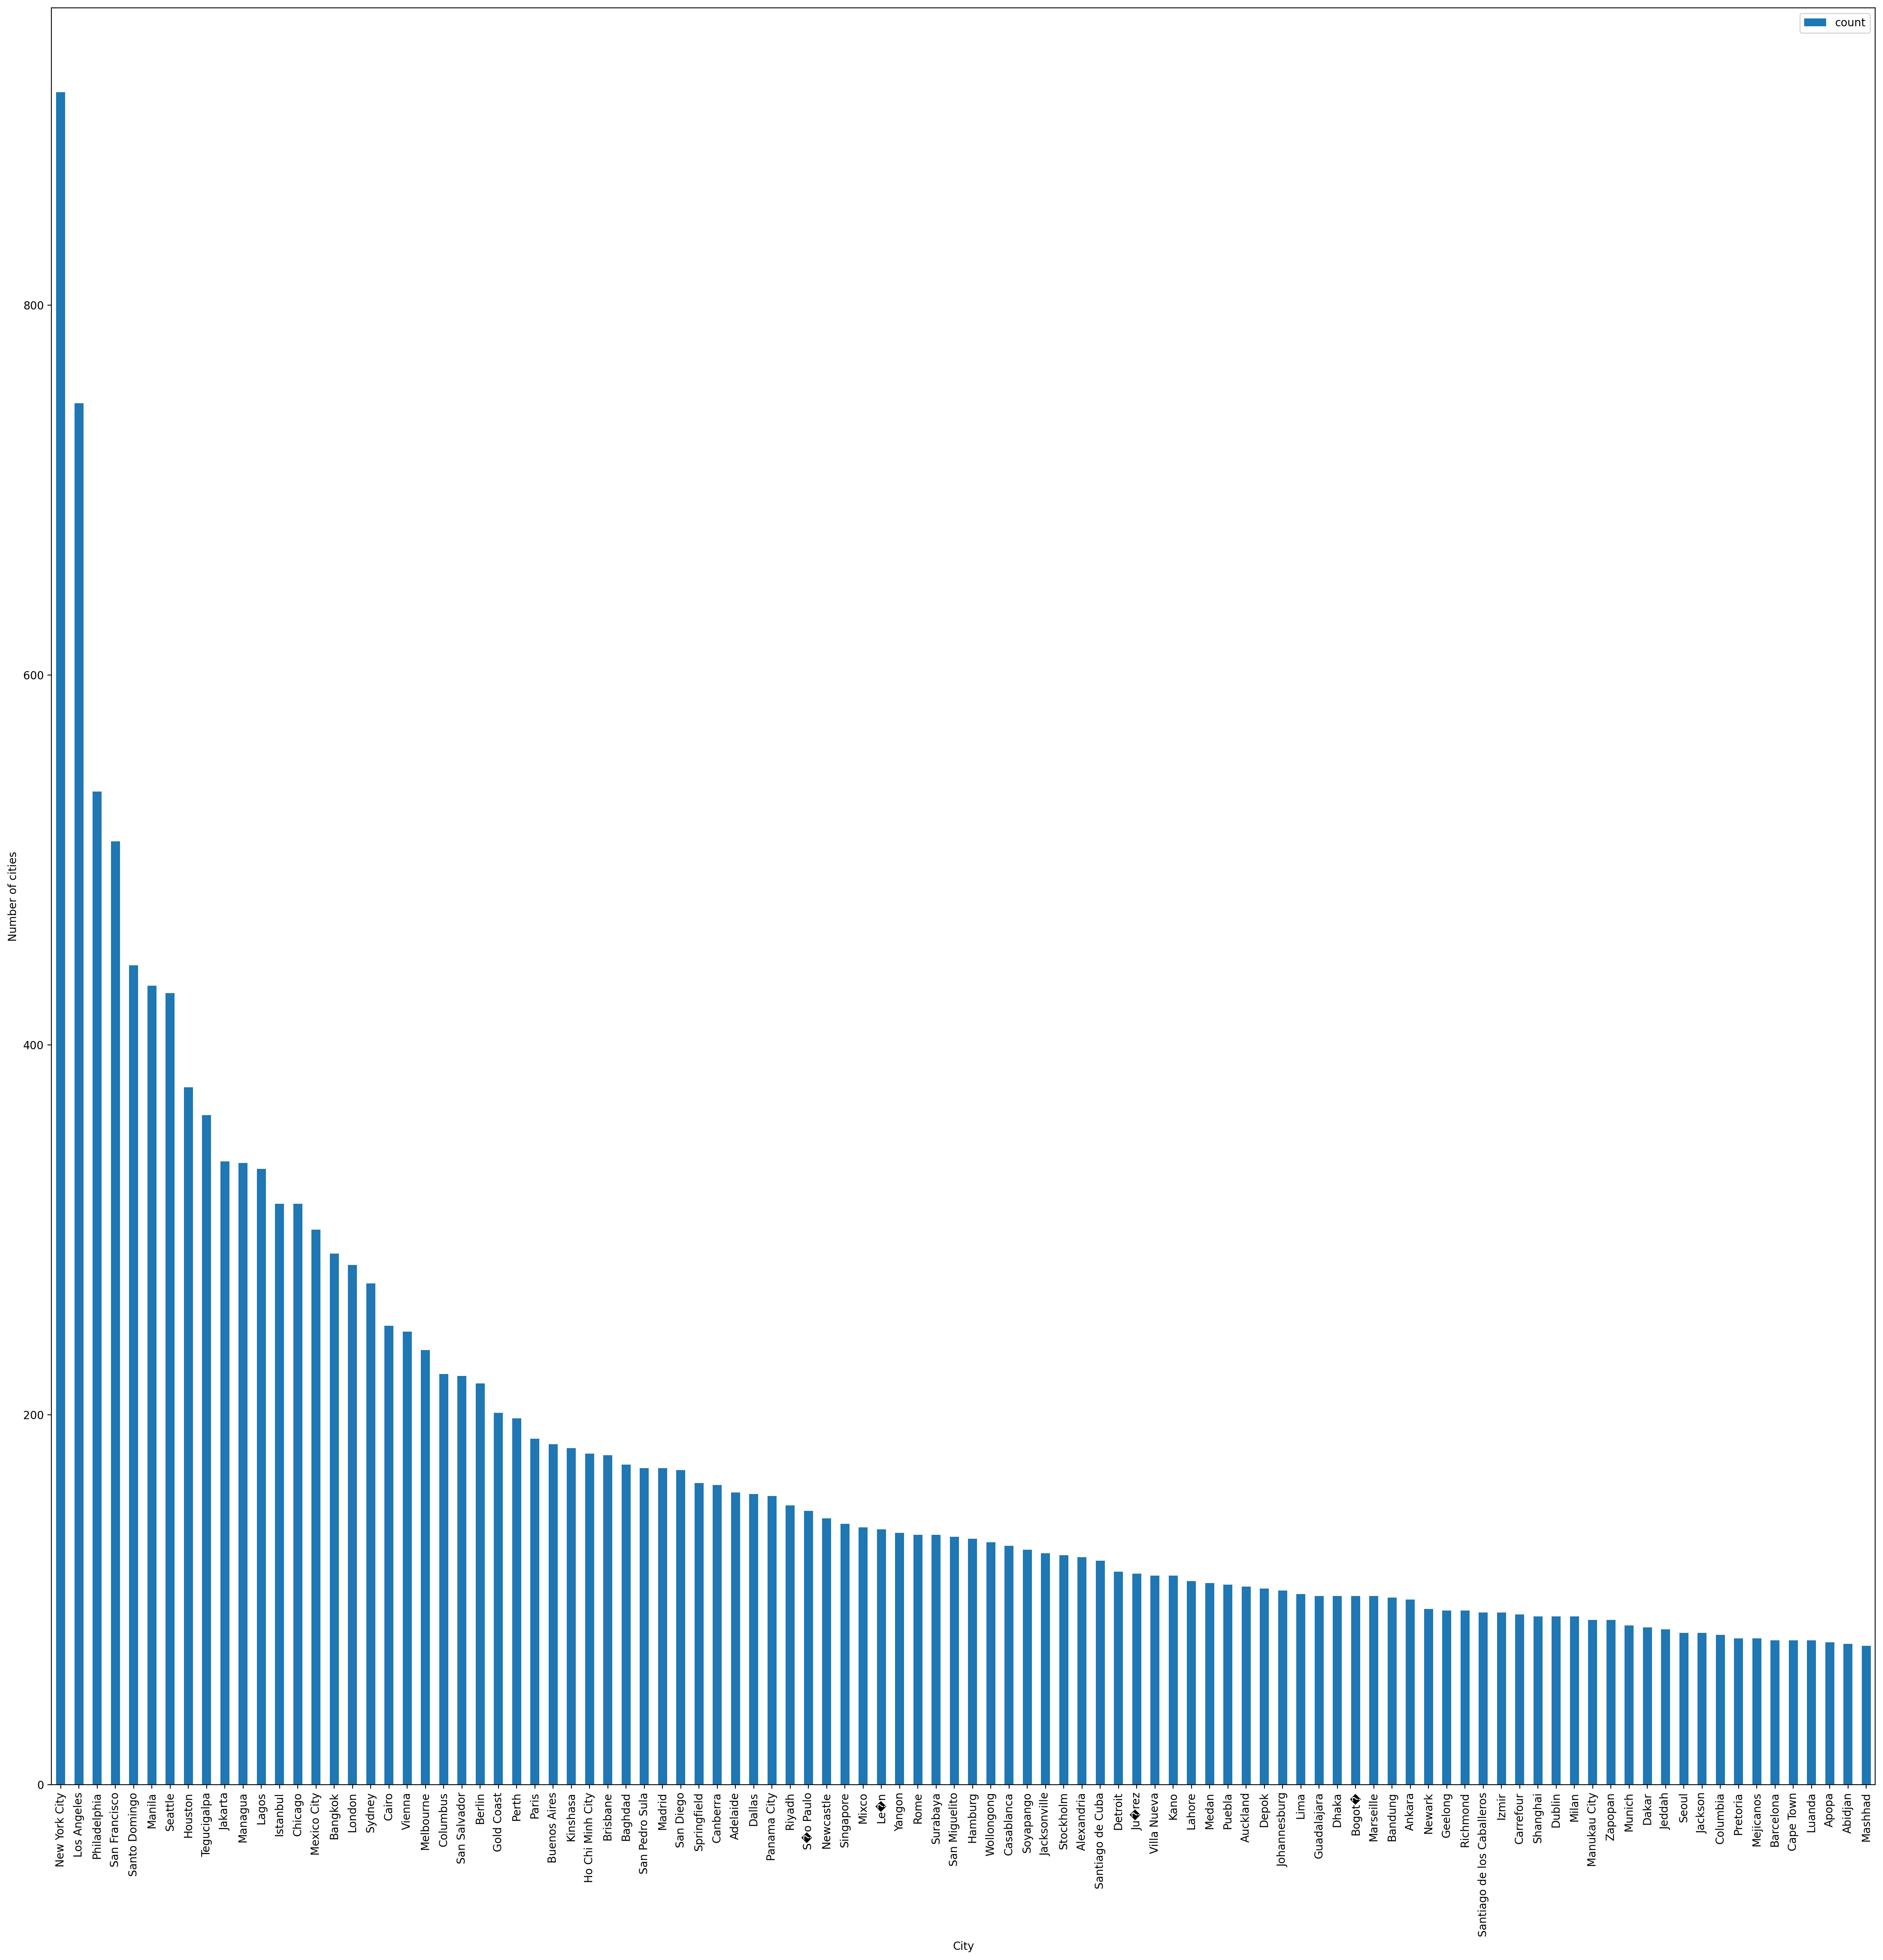

In [104]:
cities.sort_values(by="count", ascending=False).iloc[:100].plot.bar(x="City", y="count", xlabel="City", ylabel="Number of cities")

In [123]:
city_names = df["City"].unique()
profits = [df[df["City"] == city_name]["Profit"].sum() for city_name in city_names]
cities_profits = pd.DataFrame({"City": city_names, "Profit": profits})
cities_profits

City      Profit
0         Constantine    339.6000
1         Wagga Wagga   1186.1670
2            Budapest   1943.4600
3           Stockholm -11632.8900
4               Dhaka  10297.4800
...               ...         ...
3631  San Luis Obispo      1.1946
3632           Maxixe      4.4100
3633         Missoula    152.4950
3634          Lannion    123.0030
3635        Deer Park    -10.3860

[3636 rows x 2 columns]

<AxesSubplot:xlabel='City', ylabel='Profit'>

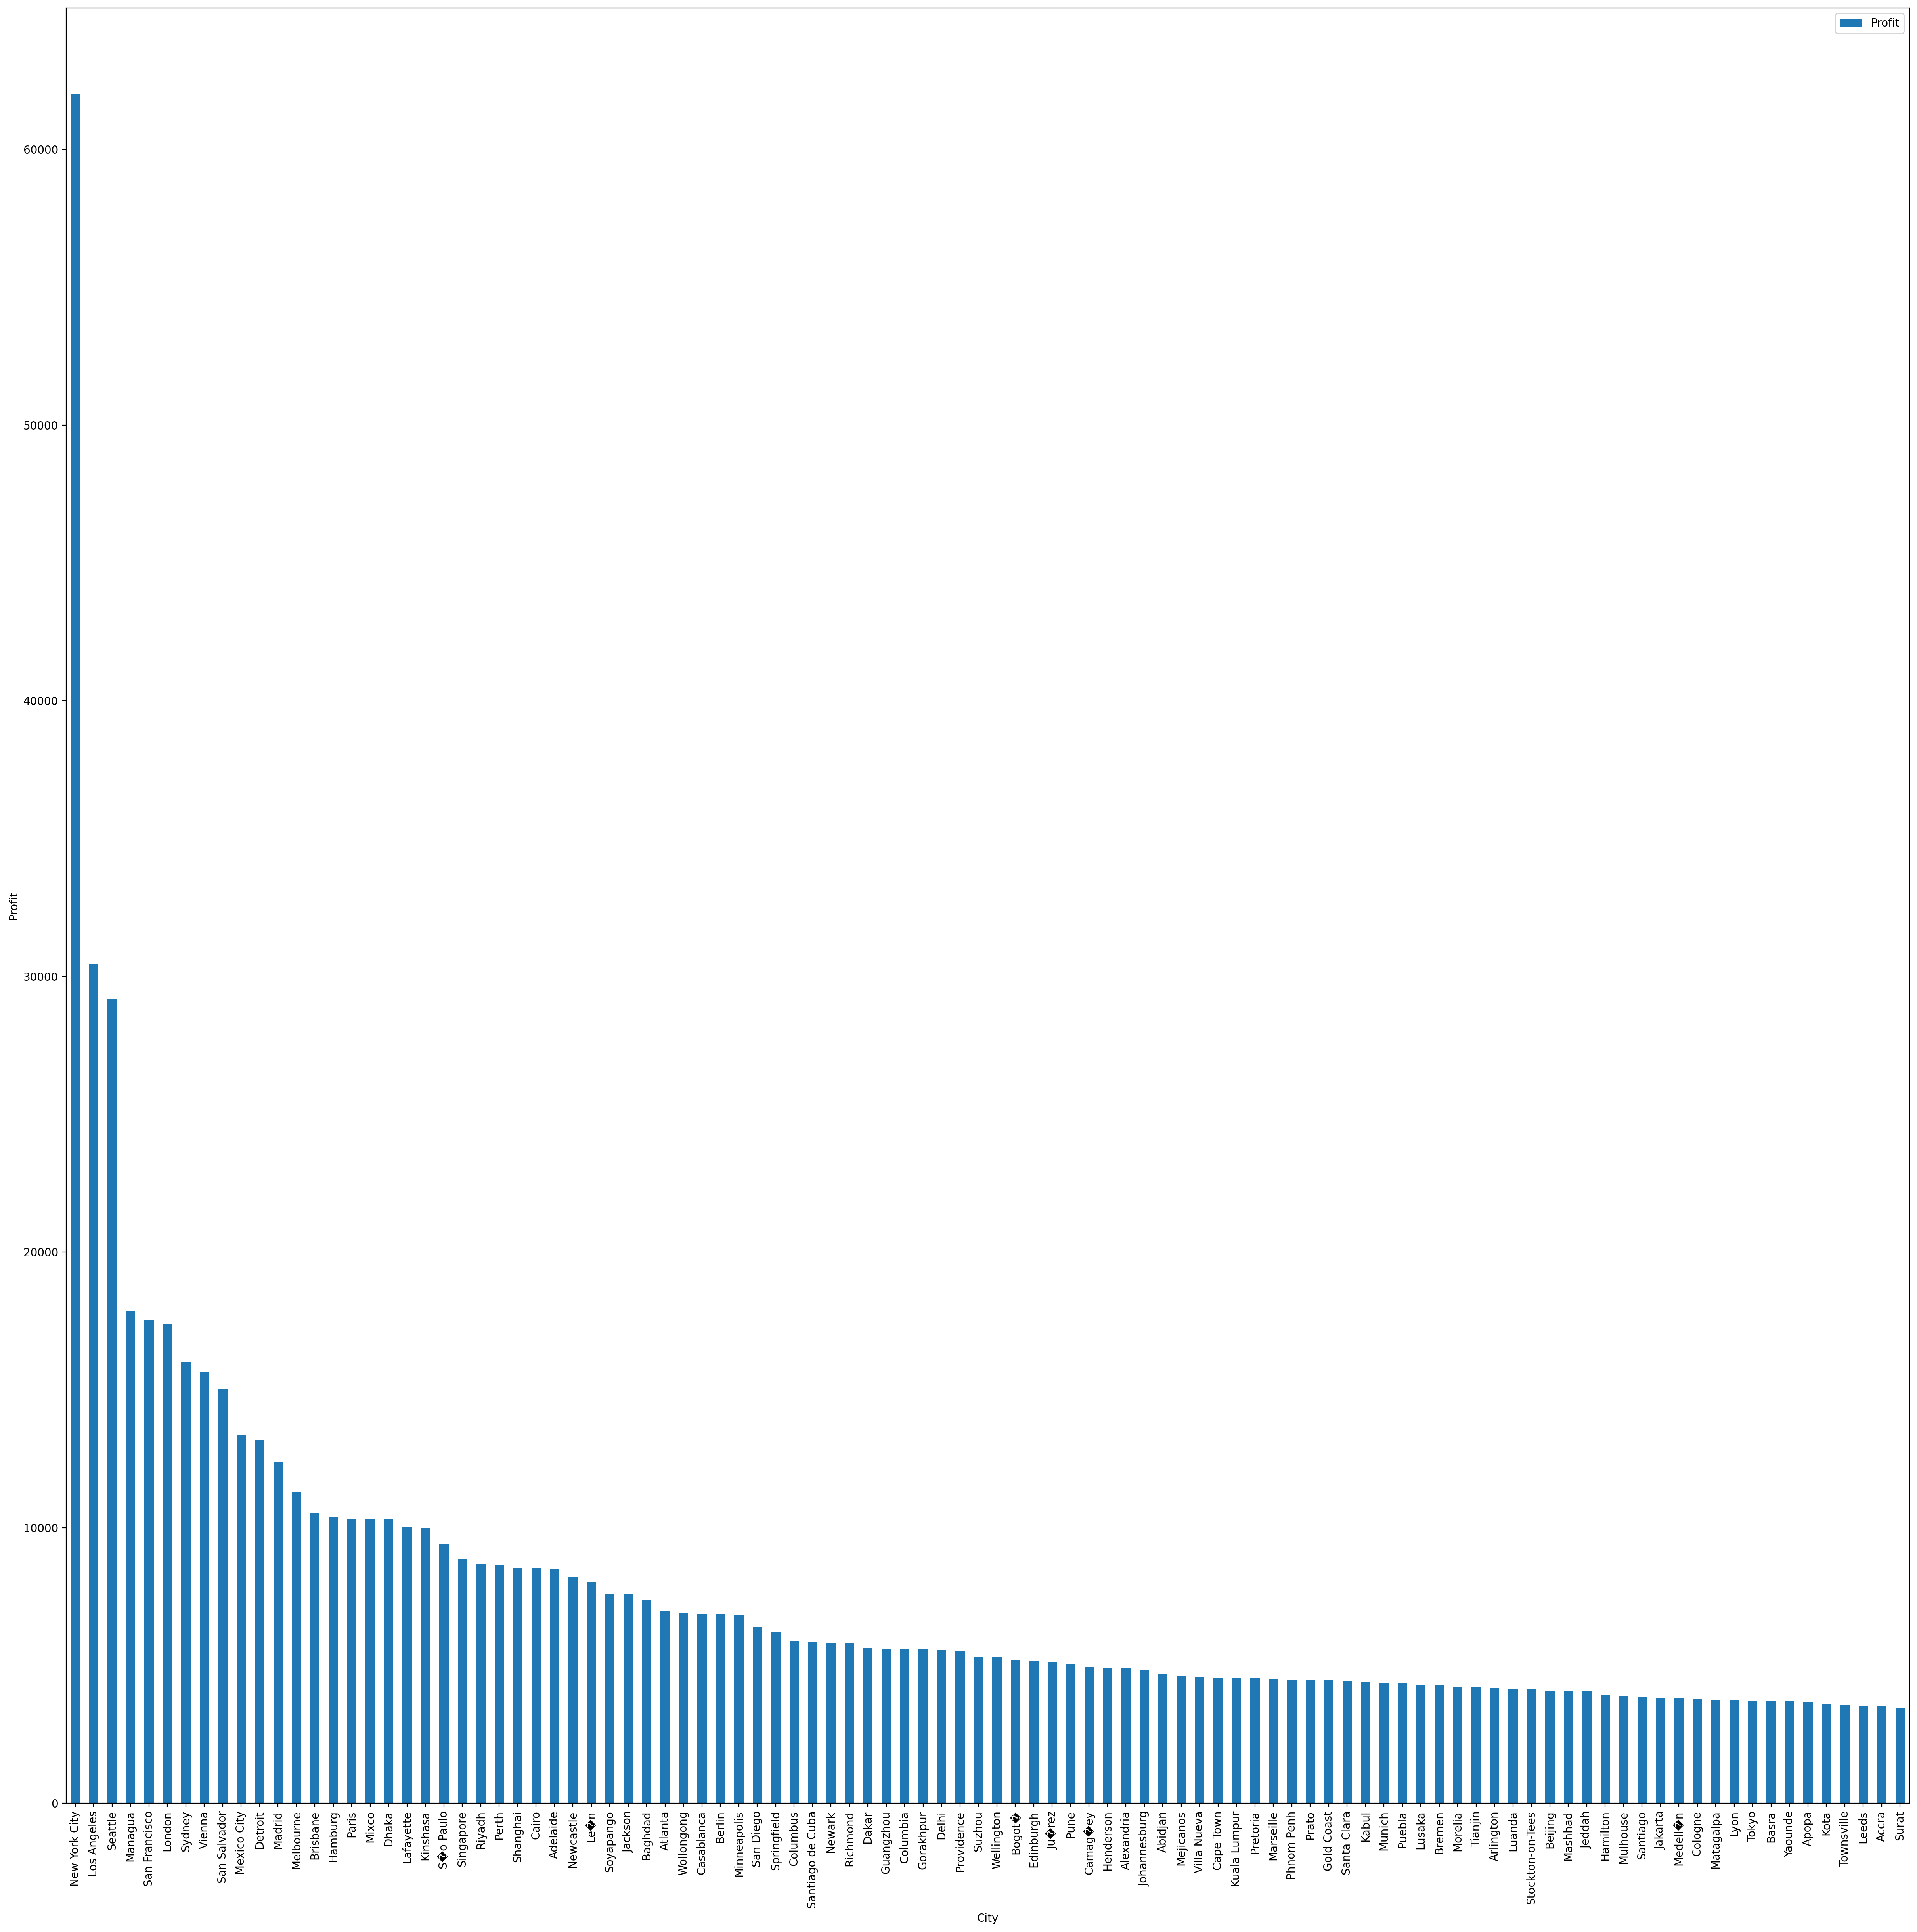

In [124]:
cities_profits.sort_values(by="Profit", ascending=False).iloc[:100].plot.bar(x="City", y="Profit", ylabel="Profit")

<AxesSubplot:xlabel='City', ylabel='Profit'>

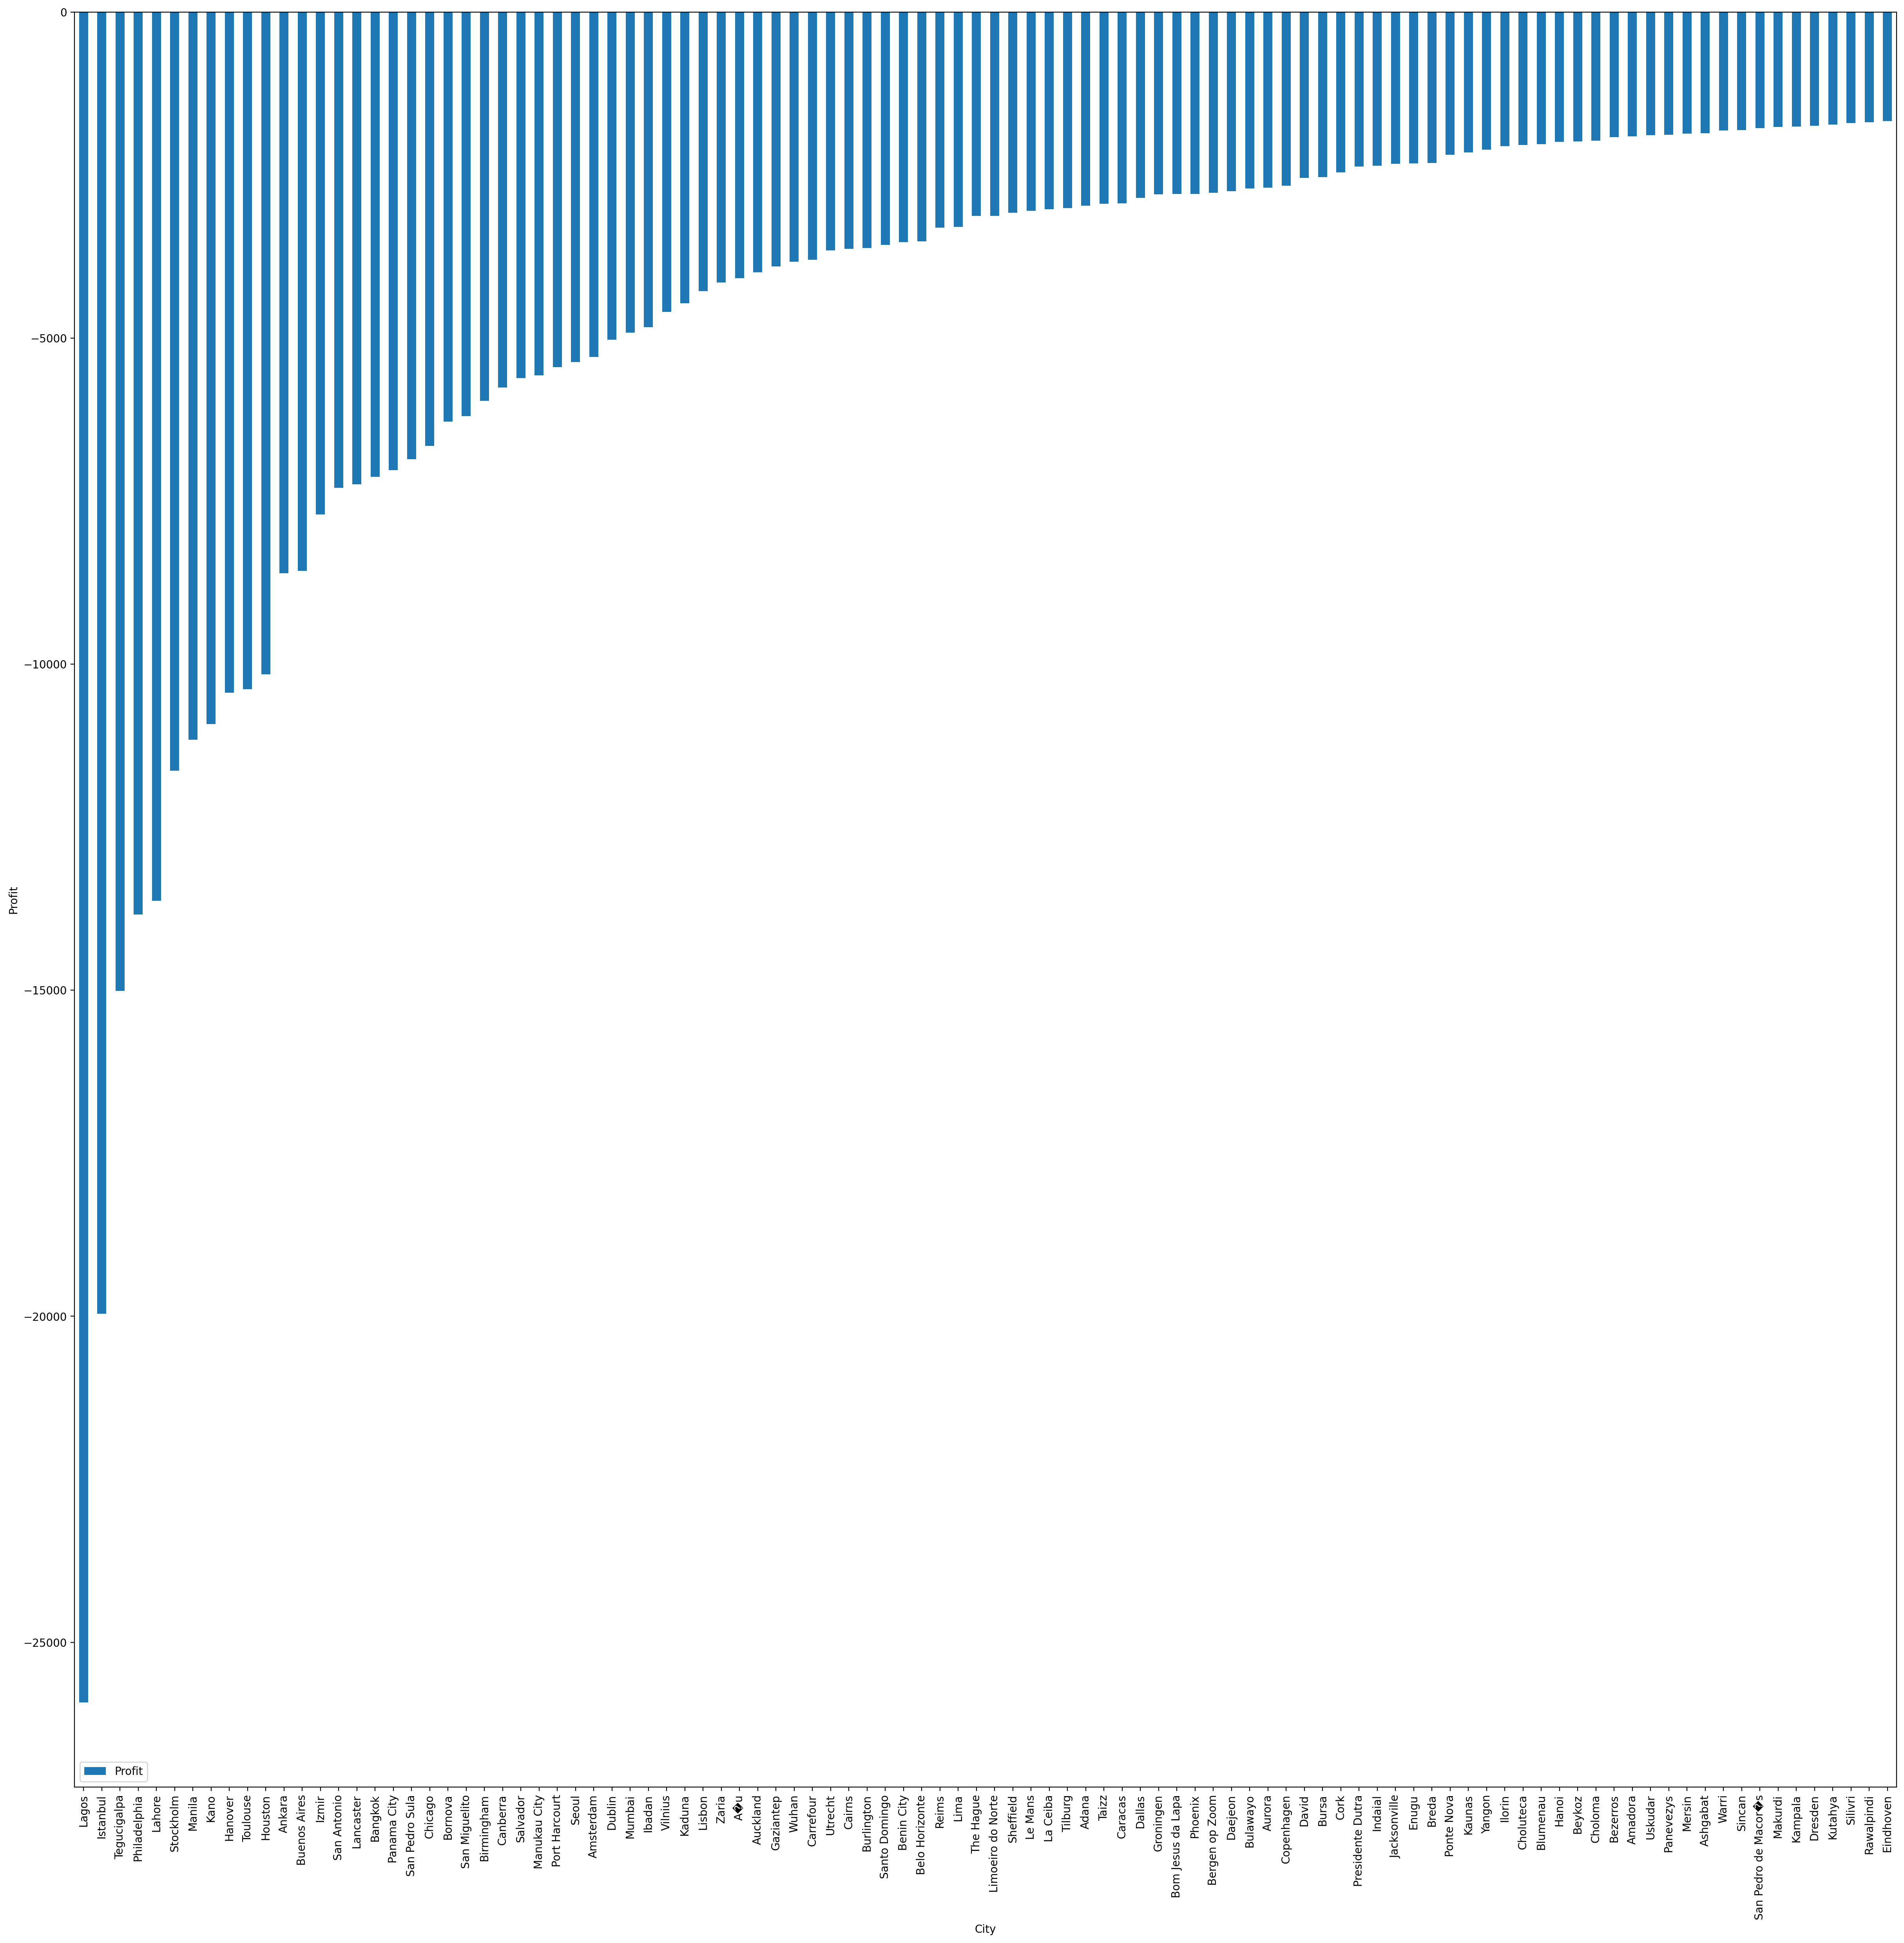

In [125]:
cities_profits.sort_values(by="Profit", ascending=True).iloc[:100].plot.bar(x="City", y="Profit", ylabel="Profit")